In [25]:
import sqlite3
import pandas as pd
import STAT5102_2023 as ct # common tools

In [2]:
# Connect to the SQLite database
con = sqlite3.connect("Topic1_dataset.sqlite")

# Create a cursor to execute SQL commands
cur = con.cursor()

In [23]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
tables

[('sqlite_sequence',), ('products',), ('purchase',), ('sales',), ('shops',)]

## Preview tables

In [ ]:
def get_pd_dataframe(query, connection):
    return pd.read_sql_query(query, connection)

In [20]:
products_preview = get_pd_dataframe("SELECT * FROM products limit 5;", con)
products_preview

,product,title,price,book_original_price,barcode,barcode2,isbn
0,000737108X,David Walliams - Billionaire Boy,112.0,115.00,9780007371082,9780007371082,None
1,006445083X,Let's Read-and-Find-Out - Science (S-1): My Fi...,59.9,59.90,9780064450836,9780064450836,None
2,01091,University Games: Captain Underpants Rip Roari...,199.0,199.00,794764010916,794764010916,01091
3,01093,Univeristy Games: Captain Underpants Sign Chan...,149.0,149,794764010930,794764010930,01093
4,0140563784,Eric Carle - From Head to Toe,112.0,99.90,9780140563788,9780140563788,None


In [19]:
purchase_preview = get_pd_dataframe("SELECT * FROM purchase limit 5;", con)
purchase_preview

,invoice,product,quantity,trandate,price,discount,disc_amt,amount
0,30002922,9781445489155,111,2014-01-03 00:00:00.000,8.1640,0,0,906.204
1,30002923,9789888155408,3000,2014-01-03 00:00:00.000,2.4000,0,0,7200.000
2,30002922,9781445414683,96,2014-01-03 00:00:00.000,11.3825,0,0,1092.720
3,30002923,9789888155392,3000,2014-01-03 00:00:00.000,2.4000,0,0,7200.000
4,30002922,9781781860373,144,2014-01-03 00:00:00.000,8.2425,0,0,1186.920


In [21]:
sales_preview = get_pd_dataframe("SELECT * FROM sales limit 5;", con)
sales_preview

,channel,location,invoice,clients,product,quantity,trandate,price,discount,disc_amt,amount
0,Retail,09,012245,None,1450810063,1,2014-01-01 00:00:00.000,198.0,0,0,198.0
1,Retail,09,012249,None,9782764320310,1,2014-01-01 00:00:00.000,75.0,0,0,75.0
2,Retail,09,012254,None,2764318715,1,2014-01-01 00:00:00.000,125.0,0,0,125.0
3,Retail,09,012255,None,140523461X,1,2014-01-01 00:00:00.000,35.0,0,0,35.0
4,Retail,09,012265,None,1445426714,1,2014-01-01 00:00:00.000,99.9,0,0,99.9


In [22]:
shops_preview = get_pd_dataframe("SELECT * FROM shops limit 5;", con)
shops_preview

,location,shopname,isactive,shopadd1,shopadd2,shopadd3,shopadd4
0,01,OFFICE,Y,Active Minds Ltd.,"Blk A, 6/F., Tai Ping Industrial Park,","51 Ting Kok Road,","Tai Po, N.T."
1,02,BOOK FAIR,Y,Active Minds Ltd.,Tel: (852) 2690-4766,None,None
2,03,BOOK CASTLE-OT,Y,Book Castle - OT,"OT G45-G46, G/F, Ocean Terminal","Harbour City, Kowloon.",Tel: 2737 2343 Fax: 2737 2344
3,04,BOOK BUDDY - WH,Y,Book Buddy - WH,"Shop 208, 2/F., Windsor House,","311 Gloucester Road, CWB, H.K.",Tel: 2376 2230 Fax: 2376 2280
4,05,School Bookfair,Y,Active Minds Ltd.,Tel: (852) 2690-4766,Fax: (852) 2690-3422,None


In [24]:
sqlite_sequence_preview = get_pd_dataframe("SELECT * FROM sqlite_sequence limit 5;", con)
sqlite_sequence_preview

,name,seq


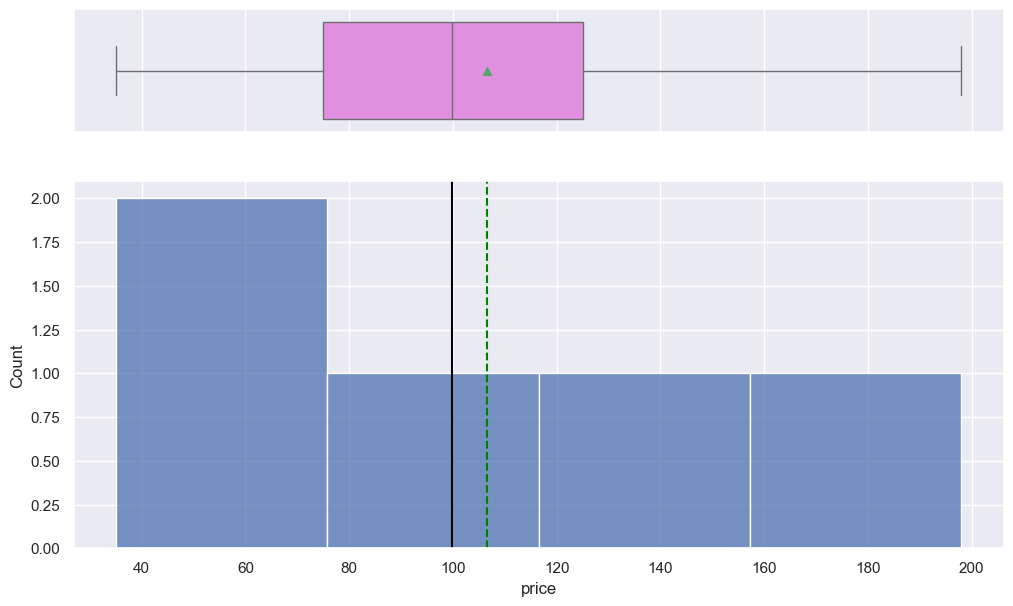

In [27]:
ct.histogram_boxplot(get_pd_dataframe("SELECT * FROM sales limit 5;", con), 'price')